## Kmeans


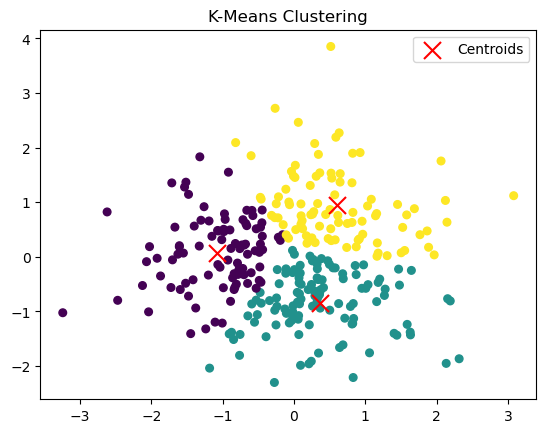

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)
data = np.random.randn(300, 2) 
def kmeans(data, k=3, max_iter=100):
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]
    for m in range(max_iter):
        distance_matrix = np.zeros((data.shape[0], 3))
        labels = np.zeros(data.shape[0])
        for i in range(distance_matrix.shape[0]):
            min_val = float('inf')
            for j in range(distance_matrix.shape[1]):
                distance_matrix[i][j] = np.sqrt((data[i][0] - centroids[j][0])**2 + (data[i][1] - centroids[j][1])**2)
                if distance_matrix[i][j] < min_val:
                    labels[i] = j
                    min_val = distance_matrix[i][j]
        new_centroids = np.zeros((k, data.shape[1]))
        for j in range(k):
            new_centroids[j] = np.mean(data[labels == j], axis=0)
        
        if np.all((new_centroids - centroids) < 1e-5):
            break

        centroids = new_centroids

    return centroids, labels
    
centroids, labels = kmeans(data, k=3, max_iter=10)

def plot_kmeans(data, centroids, labels):
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o', s=30)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=150, label='Centroids')
    plt.title('K-Means Clustering')
    plt.legend()
    plt.show()

plot_kmeans(data, centroids, labels)

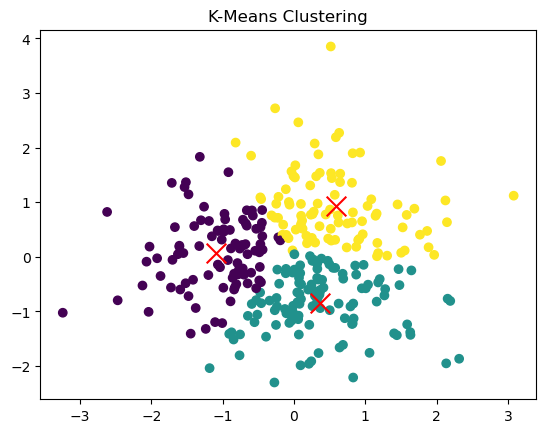

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 生成示例数据
np.random.seed(42)
data = np.random.randn(300, 2)
df = pd.DataFrame(data, columns=['x', 'y'])

# 定义 K-Means 函数
def k_means(data, k, max_iter=100):
    # 随机初始化质心
    centroids = data.sample(n=k).values
    for _ in range(max_iter):
        # 计算每个点到质心的距离
        distances = np.sqrt(((data.values - centroids[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)
        # 计算新的质心
        new_centroids = np.array([data.values[labels == i].mean(axis=0) for i in range(k)])
        # 检查质心是否变化
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return labels, centroids

# 应用 K-Means 算法
k = 3
labels, centroids = k_means(df, k)

# 可视化结果
plt.scatter(df['x'], df['y'], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=200)
plt.title('K-Means Clustering')
plt.show()


## KNNs

In [11]:
import numpy as np
import pandas as pd
from collections import Counter


data = {
    'feature1': [1, 2, 3, 6, 7, 8],
    'feature2': [1, 2, 3, 6, 7, 8],
    'label': ['A', 'A', 'A', 'B', 'B', 'B']
}
df = pd.DataFrame(data)


def knn_classify(train_data, test_point, k):
    # 计算欧氏距离
    distances = np.sqrt(((train_data[['feature1', 'feature2']] - test_point)**2).sum(axis=1))
    # 获取距离最近的 K 个点
    nearest_neighbors = train_data.iloc[np.argsort(distances)[:k]]
    # 统计每个类别的出现次数
    votes = Counter(nearest_neighbors['label'])
    # 返回得票最多的类别
    return votes.most_common(1)[0][0]


test_point = pd.Series({'feature1': 5, 'feature2': 5})
k = 3
predicted_label = knn_classify(df, test_point, k)
print(f'Predicted label: {predicted_label}')


Predicted label: B


## Gradient decent

线性回归模型参数 theta: [4.21509616 2.77011339]


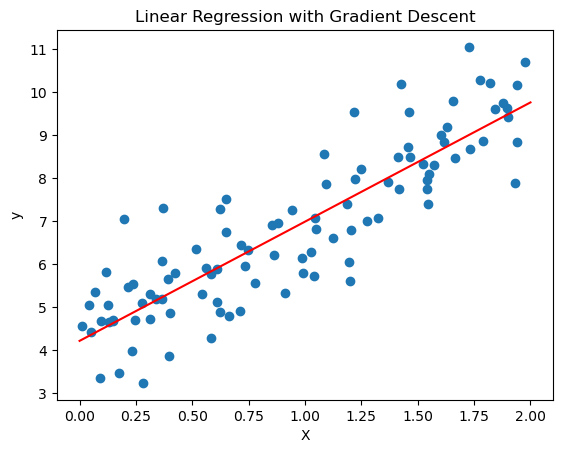

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X[:, 0] + np.random.randn(100)


def gradient_descent(X, y, lr=0.1, n_iter=1000):
    m = len(y)
    X_b = np.c_[np.ones((m, 1)), X]  # 添加偏置项 x0 = 1
    theta = np.random.randn(2)
    for _ in range(n_iter):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta -= lr * gradients
    return theta


theta = gradient_descent(X, y)
print(f' theta: {theta}')


plt.scatter(X, y)
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta)
plt.plot(X_new, y_predict, 'r-')
plt.title('Linear Regression with Gradient Descent')
plt.xlabel('X')
plt.ylabel('y')
plt.show()


## Markov chain

In [14]:
import numpy as np
import pandas as pd


states = ['Sunny', 'Cloudy', 'Rainy']
transition_matrix = pd.DataFrame({
    'Sunny': [0.8, 0.1, 0.2],
    'Cloudy': [0.1, 0.6, 0.2],
    'Rainy': [0.1, 0.3, 0.6]
}, index=states)


initial_state = 'Sunny'


def markov_chain(transition_matrix, initial_state, steps):
    current_state = initial_state
    state_sequence = [current_state]
    for _ in range(steps):
        probabilities = transition_matrix.loc[current_state]
        current_state = np.random.choice(states, p=probabilities)
        state_sequence.append(current_state)
    return state_sequence


steps = 10
sequence = markov_chain(transition_matrix, initial_state, steps)
print('天气状态序列:')
print(sequence)


天气状态序列:
['Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Rainy', 'Rainy']
